In [1]:
#importing req. Lib.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from google.colab import files
uploaded = files.upload()

Saving Tweets.csv to Tweets (1).csv


In [2]:
#Read in the datafile
df = pd.read_csv('Tweets.csv')

#Number of rows and columns
print(df.shape)

#Looking into our data
df.head(3)

(14640, 15)


tweet_id airline_sentiment  airline_sentiment_confidence  \
0  570306133677760513           neutral                        1.0000   
1  570301130888122368          positive                        0.3486   
2  570301083672813571           neutral                        0.6837   

  negativereason  negativereason_confidence         airline  \
0            NaN                        NaN  Virgin America   
1            NaN                        0.0  Virgin America   
2            NaN                        NaN  Virgin America   

  airline_sentiment_gold        name negativereason_gold  retweet_count  \
0                    NaN     cairdin                 NaN              0   
1                    NaN    jnardino                 NaN              0   
2                    NaN  yvonnalynn                 NaN              0   

                                                text tweet_coord  \
0                @VirginAmerica What @dhepburn said.         NaN   
1  @VirginAmerica plus you've added commercials t...         NaN   
2  @VirginAmerica I didn't today... Must mean I n...         NaN   

               tweet_created tweet_location               user_timezone  
0  2015-02-24 11:35:52 -0800            NaN  Eastern Time (US & Canada)  
1  2015-02-24 11:15:59 -0800            NaN  Pacific Time (US & Canada)  
2  2015-02-24 11:15:48 -0800      Lets Play  Central Time (US & Canada)

In [3]:
print(df.describe())
print("\n Null Count for each feature:\n")
df.isnull().sum()

           tweet_id  airline_sentiment_confidence  negativereason_confidence  \
count  1.464000e+04                  14640.000000               10522.000000   
mean   5.692184e+17                      0.900169                   0.638298   
std    7.791112e+14                      0.162830                   0.330440   
min    5.675883e+17                      0.335000                   0.000000   
25%    5.685592e+17                      0.692300                   0.360600   
50%    5.694779e+17                      1.000000                   0.670600   
75%    5.698905e+17                      1.000000                   1.000000   
max    5.703106e+17                      1.000000                   1.000000   

       retweet_count  
count   14640.000000  
mean        0.082650  
std         0.745778  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max        44.000000  

 Null Count for each feature:



tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

In [4]:
df['airline_sentiment'].value_counts()


negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

In [5]:
!pip install wordcloud
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [14]:
import re
import nltk
from nltk.corpus import stopwords 
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud,STOPWORDS
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [15]:
ps = PorterStemmer()
lemmatizer=WordNetLemmatizer()

In [16]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [17]:
def process_text(text):
    names = ['delta', 'deltaair', 'united', 'unitedair', 'southwest', 'southwestair', 'usairways',
         'virginamerica', 'american', 'americanair', 'jetblue', 'jetblues', 'usairway',
         'flight', 'airline', 'airlines']
    stopword = stopwords.words('english')
    for name in names:
        stopword.append(name)
    review = re.sub(r'[^a-zA-Z\s]','',text)
    review = review.lower()
    review= review.split()
    review = [lemmatizer.lemmatize(word) for word in review if word not in stopword]
    review = ' '.join(review)
    return review

In [10]:
data= df.copy()


In [18]:
nltk.download('stopwords')
data['processed_text'] = data['text'].apply(process_text)
data['negativereason'] = data['negativereason'].fillna('')
data['negativereason'] = data['negativereason'].apply(process_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [19]:
data['final_text_2'] = data['processed_text'] + ' ' + data['negativereason']
data[['processed_text' , 'final_text_2']]

processed_text  \
0                                          dhepburn said   
1           plus youve added commercial experience tacky   
2           didnt today must mean need take another trip   
3      really aggressive blast obnoxious entertainmen...   
4                                   really big bad thing   
...                                                  ...   
14635                        thank got different chicago   
14636  leaving minute late warning communication minu...   
14637                            please bring blackberry   
14638  money change dont answer phone suggestion make...   
14639  ppl need know many seat next plz put u standby...   

                                            final_text_2  
0                                         dhepburn said   
1          plus youve added commercial experience tacky   
2          didnt today must mean need take another trip   
3      really aggressive blast obnoxious entertainmen...  
4                         really big bad thing cant tell  
...                                                  ...  
14635                       thank got different chicago   
14636  leaving minute late warning communication minu...  
14637                           please bring blackberry   
14638  money change dont answer phone suggestion make...  
14639  ppl need know many seat next plz put u standby...  

[14640 rows x 2 columns]

In [20]:
text = " ".join(review for review in data.final_text_2)
print ("There are a total of {} words in the combination of all review.".format(len(text)))

There are a total of 981686 words in the combination of all review.


**Part 1: For all the major airlines, generate the word cloud.**

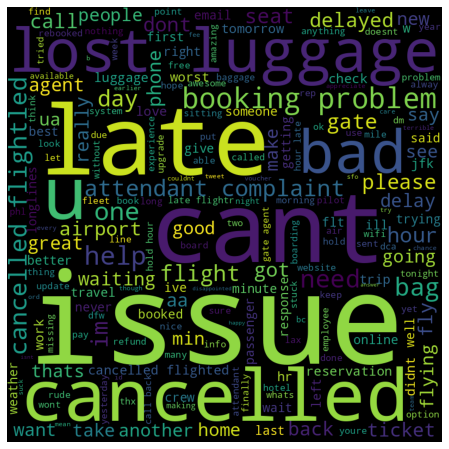

In [21]:
#Negative Stopwords
new_df=df[df['airline_sentiment']=='negative']
stopwords = set(STOPWORDS)
stopwords.update(["thank", "thanks", "service","plane", "amp", "customer", "way", "next", "told", "time", "staff", "go", "know", "still", "even", "guy", "yes", "come", "instead", "number", "made", "pm", "tell", "much", "already", "change", "today", "fleek"])

wordcloud = WordCloud(stopwords=stopwords, width=800, height=800, background_color='black').generate(" ".join(data['final_text_2'].tolist()))
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()


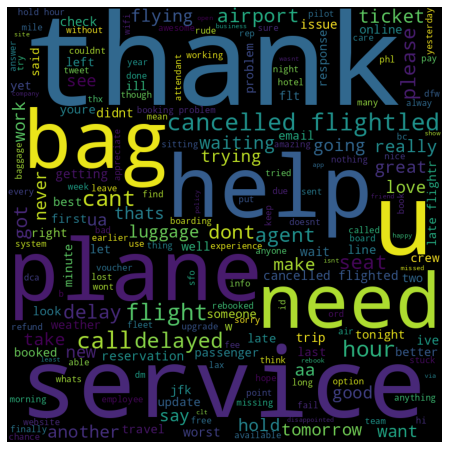

In [22]:
#Negative Stopwords
new_df=df[df['airline_sentiment']=='positive']
stopwords1 = set(STOPWORDS)
stopwords1.update(["im", "day", "back", "home", "give", "gate", "people", "one", "fly", "phone", "hr", "min", "whats" "plane", "amp", "customer", "way", "next", "told", "time", "staff", "go", "know", "still", "even", "guy", "yes", "come", "instead", "number", "made", "pm", "tell", "much", "already", "change", "today", "fleek"])

wordcloud = WordCloud(stopwords=stopwords1, width=800, height=800, background_color='black').generate(" ".join(data['processed_text'].tolist()))
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [23]:
airlines = ['American', 'Delta', 'Southwest', 'US Airways', 'United', 'Virgin America']

Word cloud for all airlines without considering sentiment

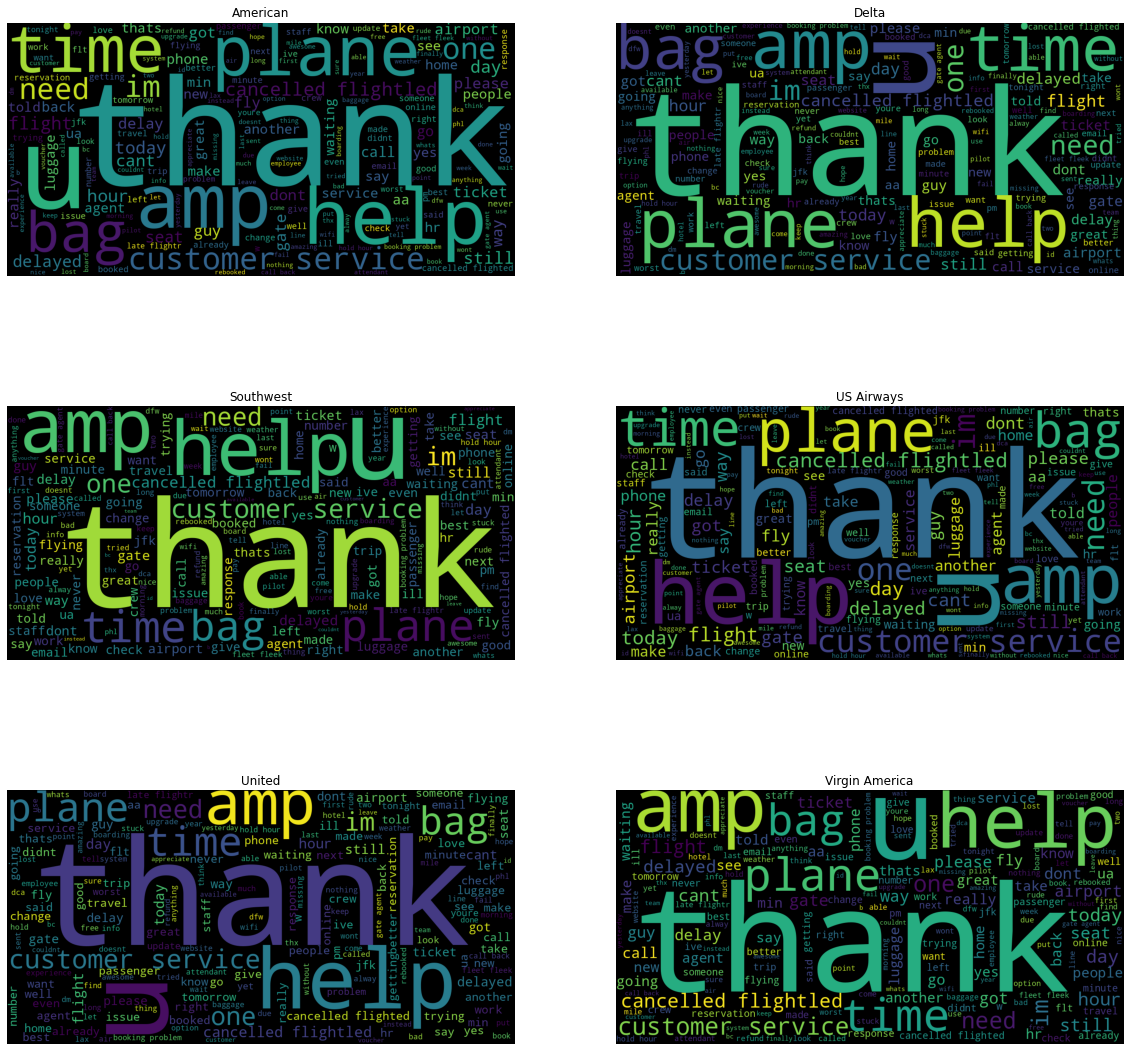

In [24]:
stopwords1 = set(STOPWORDS)
fig, axs = plt.subplots(3, 2, figsize=(20, 20))

for i in range(len(airlines)):
    row = i // 2
    col = i % 2
    new_df = df[df['airline'] == airlines[i]]
    wordcloud = WordCloud(stopwords=stopwords1, width=1200, height=600, background_color='black').generate(" ".join(data['processed_text'].tolist()))
    axs[row, col].imshow(wordcloud)
    axs[row, col].set_title(airlines[i])
    axs[row, col].axis('off')

plt.show()

word cloud for all major airlines with positive sentiment

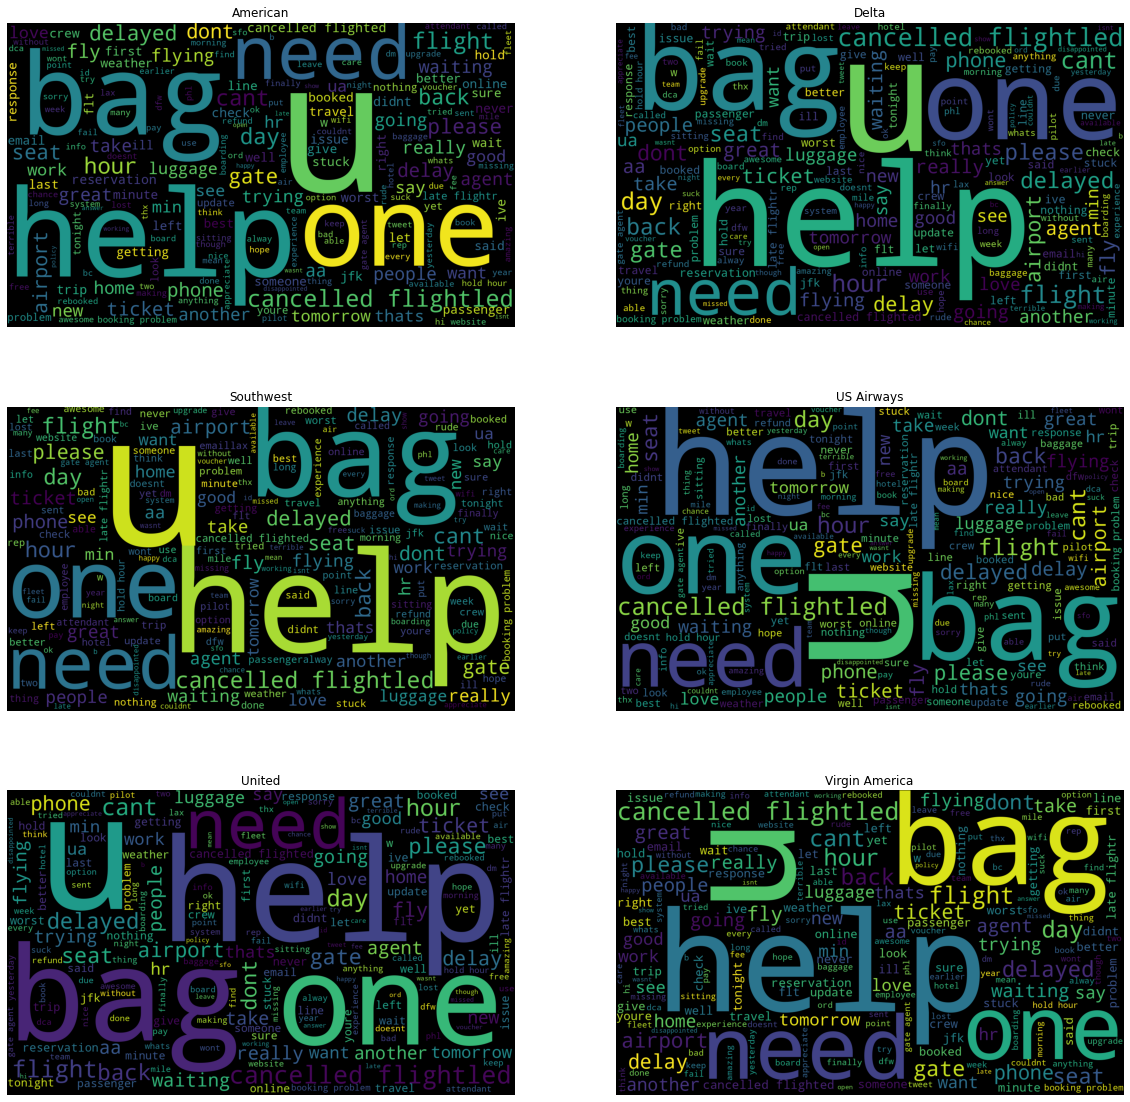

In [25]:
# set up the stopwords
stopwords1 = set(STOPWORDS)
stopwords1.update(["im", "got", "call", "make", "thank", "thanks", "service","plane", "amp", "customer", "way", "next", "told", "time", "staff", "go", "know", "still", "even", "guy", "yes", "come", "instead", "number", "made", "pm", "tell", "much", "already", "change", "today", "fleek"])

# loop through each airline and create a word cloud for positive sentiment
fig, axs = plt.subplots(3, 2, figsize=(20, 20))

for i in range(len(airlines)):
    row = i // 2
    col = i % 2
    new_df = df[(df['airline'] == airlines[i])  & (df['airline_sentiment']=='positive')]
    wordcloud = WordCloud(stopwords=stopwords1, width=1500, height=900, background_color='black').generate(" ".join(data['processed_text'].tolist()))
    axs[row, col].imshow(wordcloud)
    axs[row, col].set_title(airlines[i])
    axs[row, col].axis('off')

plt.show()

word cloud for all major airlines with negative sentiment

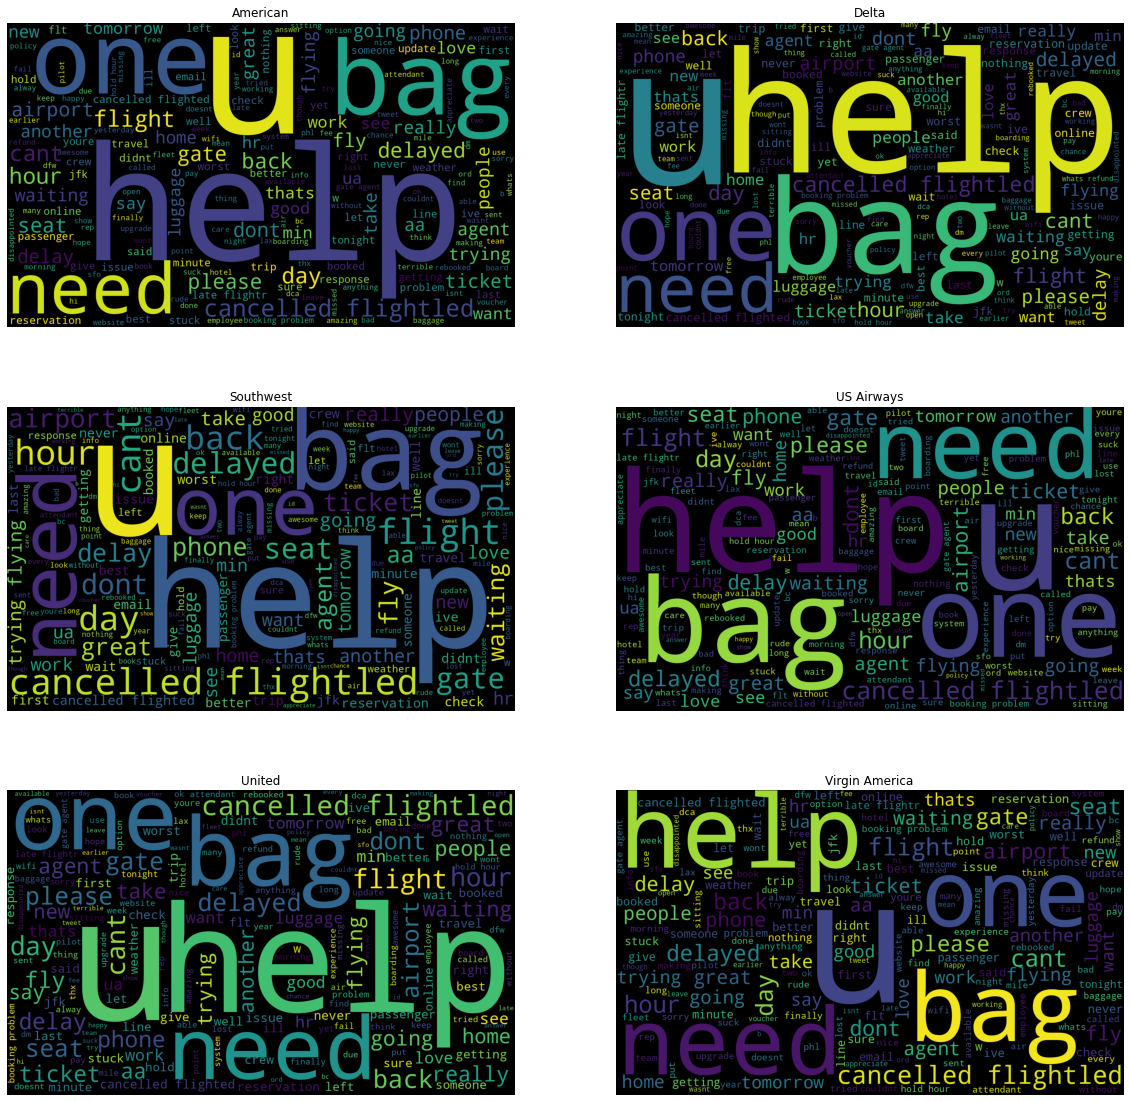

In [26]:
# set up the stopwords
stopwords1 = set(STOPWORDS)
stopwords1.update(["im", "got", "call", "make", "thank", "thanks", "service","plane", "amp", "customer", "way", "next", "told", "time", "staff", "go", "know", "still", "even", "guy", "yes", "come", "instead", "number", "made", "pm", "tell", "much", "already", "change", "today", "fleek"])

# loop through each airline and create a word cloud for positive sentiment
fig, axs = plt.subplots(3, 2, figsize=(20, 20))

for i in range(len(airlines)):
    row = i // 2
    col = i % 2
    new_df = df[(df['airline'] == airlines[i])  & (df['airline_sentiment']=='negative')]
    wordcloud = WordCloud(stopwords=stopwords1, width=1500, height=900, background_color='black').generate(" ".join(data['processed_text'].tolist()))
    axs[row, col].imshow(wordcloud)
    axs[row, col].set_title(airlines[i])
    axs[row, col].axis('off')

plt.show()

word cloud for all major airlines with neutral sentiment

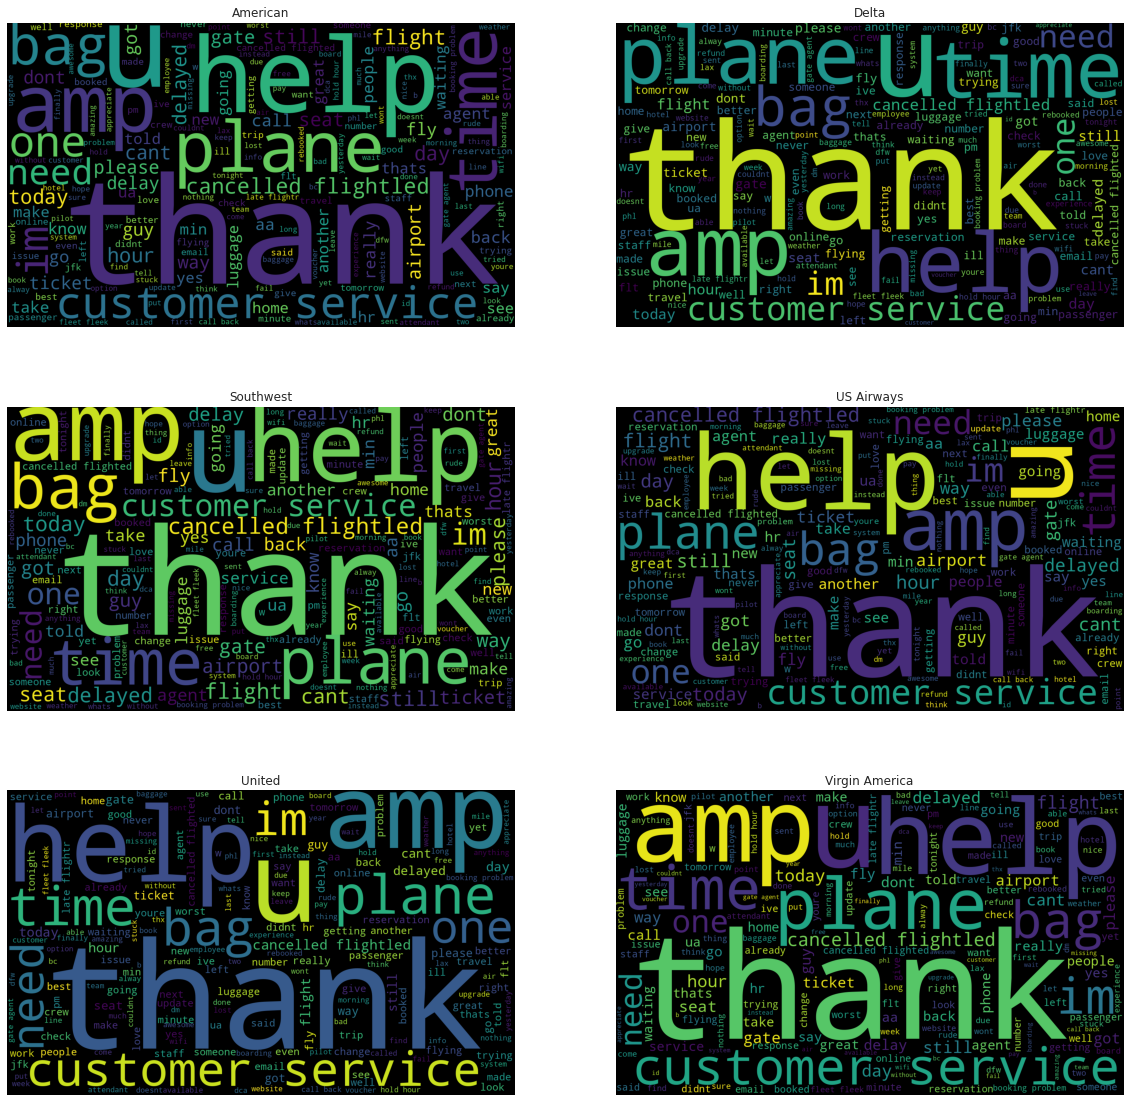

In [33]:
# set up the stopwords
stopwords1 = set(STOPWORDS)
#stopwords1.update(["im", "day", "back", "home", "give", "gate", "people", "one", "fly", "phone", "hr", "min", "whats" "plane", "amp", "customer", "way", "next", "told", "time", "staff", "go", "know", "still", "even", "guy", "yes", "come", "instead", "number", "made", "pm", "tell", "much", "already", "change", "today", "fleek"])

# loop through each airline and create a word cloud for positive sentiment
fig, axs = plt.subplots(3, 2, figsize=(20, 20))

for i in range(len(airlines)):
    row = i // 2
    col = i % 2
    new_df = df[(df['airline'] == airlines[i])  & (df['airline_sentiment']=='neutral')]
    wordcloud = WordCloud(stopwords=stopwords1, width=1500, height=900, background_color='black').generate(" ".join(data['processed_text'].tolist()))
    axs[row, col].imshow(wordcloud)
    axs[row, col].set_title(airlines[i])
    axs[row, col].axis('off')

plt.show()

In [ ]:
# new_df=df[(df['airline']=='Southwest') & (df["airline_sentiment"] == 'negative')]
# stopwords1 = set(STOPWORDS)
# stopwords1.update(["thank", "thanks", "service","plane", "amp", "customer", "way", "next", "told", "time", "staff", "go", "know", "still", "even", "guy", "yes", "come", "instead", "number", "made", "pm", "tell", "much", "already", "change", "today", "fleek"])

# txt = " ".join(data['processed_text'].tolist())
# wordcloud = WordCloud(stopwords=stopwords1, width=800, height=800, background_color='black').generate(txt)
# plt.figure(figsize=(8, 8))
# plt.imshow(wordcloud)
# plt.axis('off')
# plt.show()

In [ ]:
# new_df=df[(df['airline']=='Southwest') & (df["airline_sentiment"] == 'positive')]
# stopwords1 = set(STOPWORDS)
# stopwords1.update(["im", "day", "back", "home", "give", "gate", "people", "one", "fly", "phone", "hr", "min", "whats" "plane", "amp", "customer", "way", "next", "told", "time", "staff", "go", "know", "still", "even", "guy", "yes", "come", "instead", "number", "made", "pm", "tell", "much", "already", "change", "today", "fleek"])

# txt = " ".join(data['processed_text'].tolist())
# wordcloud = WordCloud(stopwords=stopwords1, width=800, height=800, background_color='black').generate(txt)
# plt.figure(figsize=(8, 8))
# plt.imshow(wordcloud)
# plt.axis('off')
# plt.show()

In [28]:
sentiment = df.groupby(['airline', 'airline_sentiment'])['airline_sentiment'].count().unstack()
sentiment

airline_sentiment  negative  neutral  positive
airline                                       
American               1960      463       336
Delta                   955      723       544
Southwest              1186      664       570
US Airways             2263      381       269
United                 2633      697       492
Virgin America          181      171       152

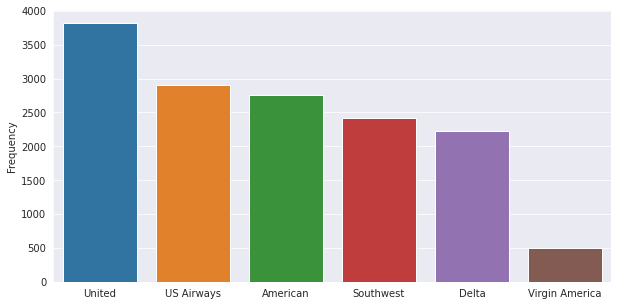

In [29]:
sns.set_style("darkgrid")

plt.figure(figsize=(10, 5))
df['airline'].value_counts()

ax = sns.barplot(x=df['airline'].value_counts().index, y=df['airline'].value_counts())
ax.set_ylabel("Frequency")

plt.show()




In [ ]:
from wordcloud import WordCloud,STOPWORDS

**Part 2: Show the distribution of positive/neutral/negative sentiment across all airlines**

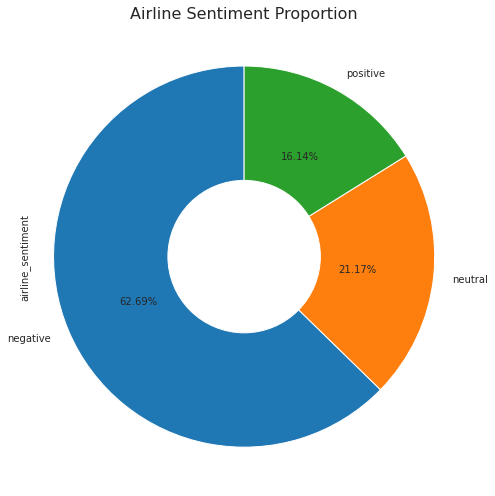

In [30]:
#Distribution of Airline Sentiments
plt.figure(figsize=(7,7))
plt.title('Airline Sentiment Proportion', fontsize=16)
sns.set_style("whitegrid")
df['airline_sentiment'].value_counts().plot(kind='pie', labels=df['airline_sentiment'].value_counts().index, autopct='%2.2f%%', startangle=90)
centre_circle = plt.Circle((0,0),0.40,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.axis('equal')
plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'Airline Sentiment Distribution')

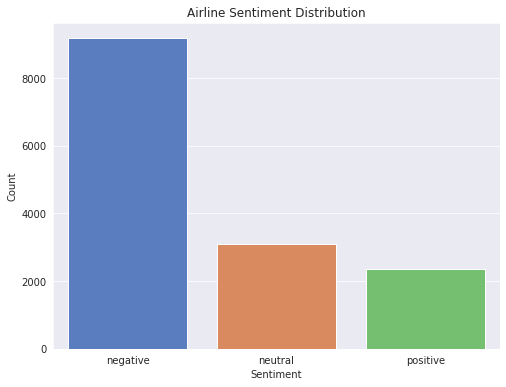

In [31]:
#Sentiment distibution across all airlines
sns.set_style("darkgrid")
plt.figure(figsize=(8,6))
ax = sns.barplot(x=df['airline_sentiment'].value_counts().index, y=df['airline_sentiment'].value_counts(), palette="muted")

# Set the axis labels and title
ax.set_xlabel("Sentiment")
ax.set_ylabel("Count")
ax.set_title("Airline Sentiment Distribution")

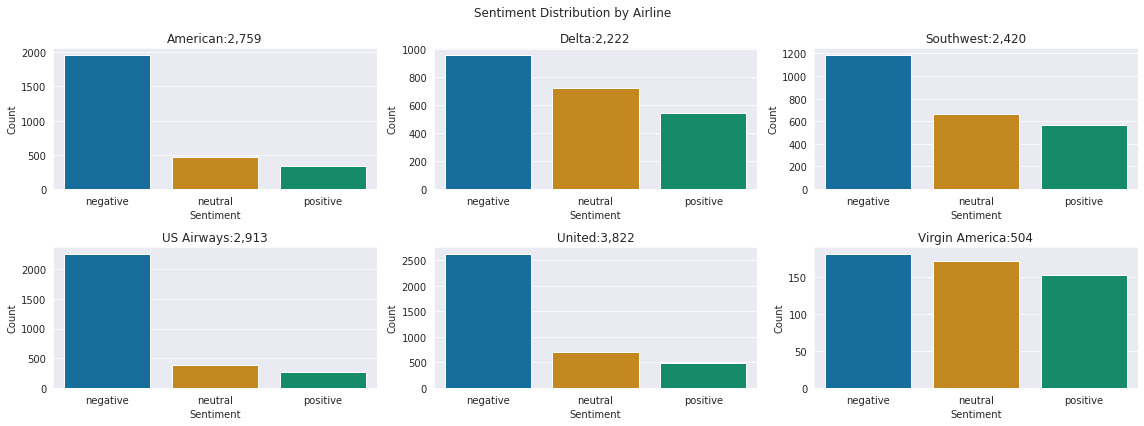

In [32]:
#Sentiment distibution for each airline

fig, axes = plt.subplots(2, 3, figsize=(16, 6))
axes = axes.flatten()

for i, ax in zip(range(0, 6), axes):
    temp = sentiment.iloc[i]
    sns.barplot(x=temp.index, y=temp, palette='colorblind', ax=ax)
    ax.set_title(f"{sentiment.index[i]}:{format(sentiment.values[i].sum(),',')}")
    ax.set_xlabel("Sentiment")
    ax.set_ylabel("Count")
    plt.suptitle('Sentiment Distribution by Airline')
plt.tight_layout()
plt.show()

**Part 3: Use the emotion classifier build in HW2 to classify the emotions in these tweets. How are they correlated with the sentiments in Part 2?**

In [34]:
from google.colab import files
uploaded = files.upload()

Saving emotions.csv to emotions.csv


In [35]:
!pip install vaderSentiment


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 KB 7.4 MB/s eta 0:00:00


In [36]:
from textblob import TextBlob
#from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.metrics import confusion_matrix, precision_score, precision_recall_curve, recall_score, f1_score, accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
#from sklearn.linear_model import LogisticRegression

In [37]:
df_emotions = pd.read_csv('emotions.csv')
df_emotions.head()

sentiment                                            content
0       empty  @tiffanylue i know  i was listenin to bad habi...
1     sadness  Layin n bed with a headache  ughhhh...waitin o...
2     sadness                Funeral ceremony...gloomy friday...
3  enthusiasm               wants to hang out with friends SOON!
4     neutral  @dannycastillo We want to trade with someone w...

In [38]:
train_samples = int(len(df_emotions))

In [39]:
train = df_emotions
test = df['text']
test

0                      @VirginAmerica What @dhepburn said.
1        @VirginAmerica plus you've added commercials t...
2        @VirginAmerica I didn't today... Must mean I n...
3        @VirginAmerica it's really aggressive to blast...
4        @VirginAmerica and it's a really big bad thing...
                               ...                        
14635    @AmericanAir thank you we got on a different f...
14636    @AmericanAir leaving over 20 minutes Late Flig...
14637    @AmericanAir Please bring American Airlines to...
14638    @AmericanAir you have my money, you change my ...
14639    @AmericanAir we have 8 ppl so we need 2 know h...
Name: text, Length: 14640, dtype: object

In [40]:
# Save the train and test sets to separate CSV files
train.to_csv("train.csv", index=False)
test.to_csv("test.csv", index=False)

<Axes: >

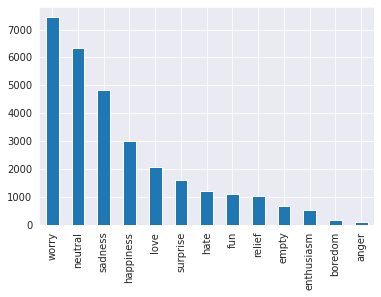

In [41]:
train['sentiment'].value_counts().plot(kind='bar')

In [42]:
counts = df_emotions['sentiment'].value_counts()
counts

worry         7433
neutral       6340
sadness       4828
happiness     2986
love          2068
surprise      1613
hate          1187
fun           1088
relief        1021
empty          659
enthusiasm     522
boredom        157
anger           98
Name: sentiment, dtype: int64

In [43]:
tv = TfidfVectorizer(ngram_range=(1,3), stop_words='english')
tv.fit(train.content)

modelELR = MultinomialNB(alpha=0.1)
modelELR.fit(tv.transform(train.content), train.sentiment)

MultinomialNB(alpha=0.1)

In [44]:
elr_pred = modelELR.predict(tv.transform(train.content))

print("Confusion Matrix:\n", confusion_matrix(train.sentiment, elr_pred))
print("F1 score:", f1_score(train.sentiment, elr_pred, average='micro'))

Confusion Matrix:
 [[  48    0    0    0    0    0    0    1   14    0    6    0   29]
 [   0   79    0    0    0    1    0    1   18    0   20    0   38]
 [   0    0  560    0    0    4    0    1   40    0   14    0   40]
 [   0    0    0  459    0    6    0    0   24    0    8    0   25]
 [   0    0    0    0 1048   10    0    1   14    0    5    0   10]
 [   0    0    0    0    0 2943    0    2   22    0    7    0   12]
 [   0    0    0    0    1    1 1149    0    5    0   14    0   17]
 [   0    0    0    0    0   10    0 2030   14    0    3    0   11]
 [   0    0    0    0    0    6    0    2 6244    0   11    0   77]
 [   0    0    0    0    0    4    1    0   20  967    6    0   23]
 [   0    0    0    0    0    2    0    0   23    0 4724    0   79]
 [   0    0    0    0    0    6    0    1   24    0    9 1539   34]
 [   0    0    0    0    0    4    0    1   16    0    6    0 7406]]
F1 score: 0.9732


In [45]:
def plot_confusion_matrix(preds, labels):
  class_labels = np.unique(df_emotions.sentiment)
  class_size = len(class_labels)
  cnf_mat = confusion_matrix(labels, preds)                            #Computes confusion_matrix
  cnf_mat = cnf_mat.astype('float') / (cnf_mat.sum(axis=1)[:, np.newaxis]+1)
  plt.imshow(cnf_mat, interpolation='nearest', cmap=plt.cm.Blues)
  #plt.xticks(np.arange(class_size), np.arange(1, class_size + 1), class_labels)
  plt.xticks(np.arange(class_size), labels=class_labels, rotation='vertical')
  plt.yticks(np.arange(class_size), labels=class_labels)
  #plt.yticks(np.arange(class_size), np.arange(1, class_size + 1), class_labels)
  plt.title('Confusion matrix of the classifier')
  plt.xlabel('True Label')
  plt.ylabel('Predicted Label')
  plt.title('Confusion Matrix')
  plt.colorbar()
  plt.show()

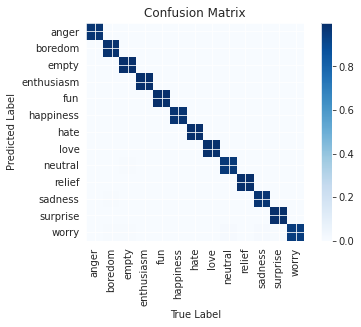

In [46]:
plot_confusion_matrix(train.sentiment, elr_pred)

<Axes: xlabel='predicted_emotions'>

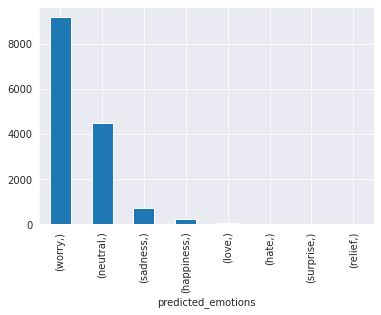

In [47]:
elr_pred = modelELR.predict(tv.transform(df.text))
elr_pred_df = pd.DataFrame(elr_pred, columns=['predicted_emotions'])
elr_pred_df.value_counts().plot(kind='bar')

In [48]:
df_new = pd.concat([df,elr_pred_df["predicted_emotions"]])

In [49]:
df = pd.concat([df, elr_pred_df], axis=1)
df.head()

tweet_id airline_sentiment  airline_sentiment_confidence  \
0  570306133677760513           neutral                        1.0000   
1  570301130888122368          positive                        0.3486   
2  570301083672813571           neutral                        0.6837   
3  570301031407624196          negative                        1.0000   
4  570300817074462722          negative                        1.0000   

  negativereason  negativereason_confidence         airline  \
0            NaN                        NaN  Virgin America   
1            NaN                     0.0000  Virgin America   
2            NaN                        NaN  Virgin America   
3     Bad Flight                     0.7033  Virgin America   
4     Can't Tell                     1.0000  Virgin America   

  airline_sentiment_gold        name negativereason_gold  retweet_count  \
0                    NaN     cairdin                 NaN              0   
1                    NaN    jnardino                 NaN              0   
2                    NaN  yvonnalynn                 NaN              0   
3                    NaN    jnardino                 NaN              0   
4                    NaN    jnardino                 NaN              0   

                                                text tweet_coord  \
0                @VirginAmerica What @dhepburn said.         NaN   
1  @VirginAmerica plus you've added commercials t...         NaN   
2  @VirginAmerica I didn't today... Must mean I n...         NaN   
3  @VirginAmerica it's really aggressive to blast...         NaN   
4  @VirginAmerica and it's a really big bad thing...         NaN   

               tweet_created tweet_location               user_timezone  \
0  2015-02-24 11:35:52 -0800            NaN  Eastern Time (US & Canada)   
1  2015-02-24 11:15:59 -0800            NaN  Pacific Time (US & Canada)   
2  2015-02-24 11:15:48 -0800      Lets Play  Central Time (US & Canada)   
3  2015-02-24 11:15:36 -0800            NaN  Pacific Time (US & Canada)   
4  2015-02-24 11:14:45 -0800            NaN  Pacific Time (US & Canada)   

  predicted_emotions  
0            neutral  
1            neutral  
2              worry  
3              worry  
4              worry

<ipython-input-50-ba65153a801c>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sentiment_vs_emotions = df.groupby('airline_sentiment')["airline", "predicted_emotions"].value_counts().unstack().fillna(0)


Pivot table for southwest sentiment and predicted emotions:
 predicted_emotions                happiness  hate  love  neutral  relief  \
airline_sentiment airline                                                  
negative          American              3.0   0.0   1.0    406.0     0.0   
                  Delta                 4.0   1.0   0.0    207.0     0.0   
                  Southwest             2.0   1.0   0.0    248.0     0.0   
                  US Airways            6.0   0.0   1.0    420.0     0.0   
                  United                1.0   0.0   0.0    948.0     0.0   
                  Virgin America        1.0   0.0   0.0     36.0     0.0   
neutral           American              8.0   0.0   0.0    143.0     0.0   
                  Delta                 5.0   0.0   1.0    266.0     0.0   
                  Southwest             7.0   0.0   2.0    218.0     0.0   
                  US Airways            6.0   0.0   1.0    114.0     0.0   
                  United   

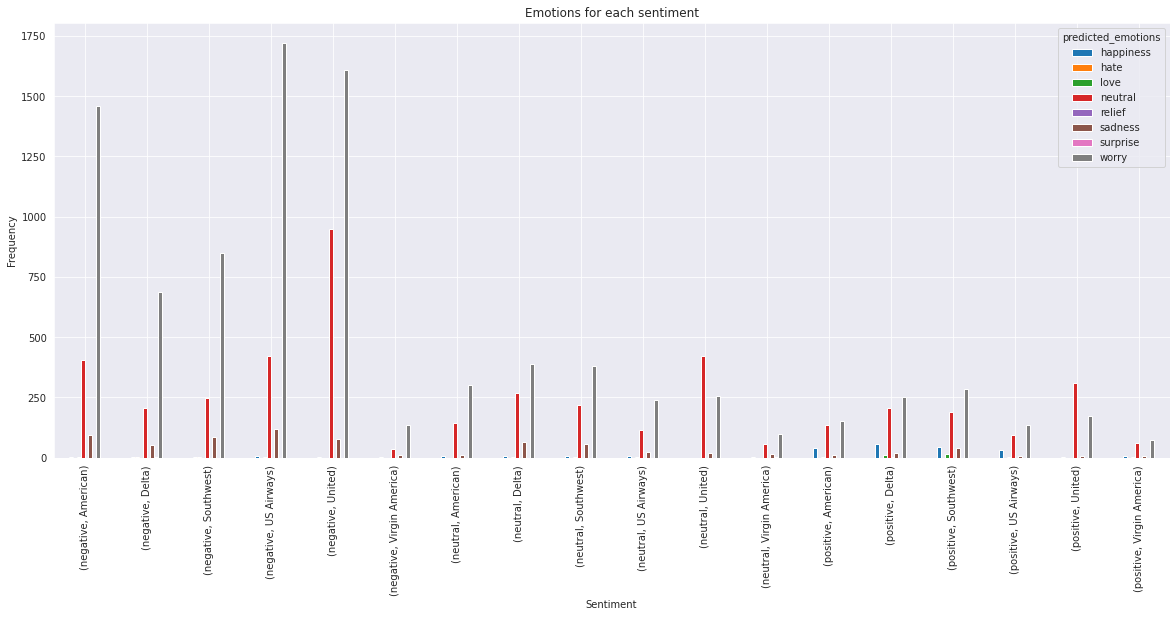

In [50]:

sentiment_vs_emotions = df.groupby('airline_sentiment')["airline", "predicted_emotions"].value_counts().unstack().fillna(0)
print("Pivot table for southwest sentiment and predicted emotions:\n", sentiment_vs_emotions)

sentiment_vs_emotions.plot(kind='bar', figsize=(20,8))
# set the title and axis labels
plt.title('Emotions for each sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')

# show the plot
plt.show()

**Part 4: What topics are people talking about in their tweets? How does this distribution of topics differ across airlines?**

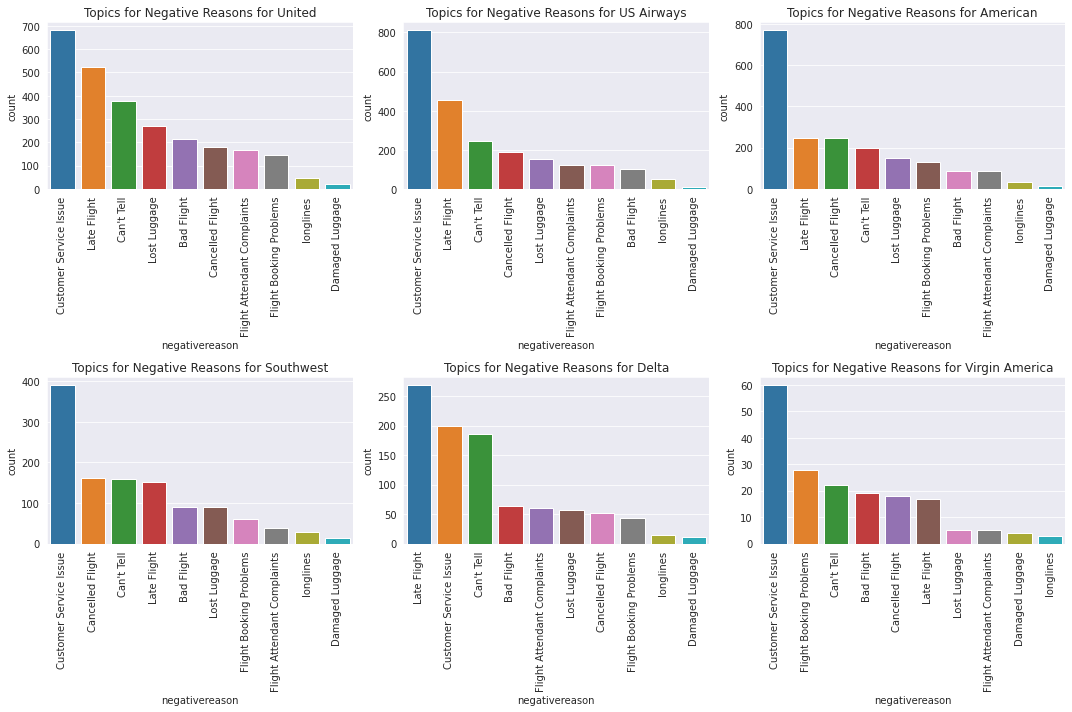

In [51]:
def plot_reason(Airline):
    df2 = df[df['airline']==Airline]
    count=df2['negativereason'].value_counts().reset_index().rename(columns={'index':'negativereason','negativereason':'count'})
    sns.barplot(data=count,x='negativereason',y='count')
    plt.title('Topics for Negative Reasons for '+Airline)
    plt.xticks(rotation=90)
plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
plot_reason('United')
plt.subplot(2,3,2)
plot_reason('US Airways')
plt.subplot(2,3,3)
plot_reason('American')
plt.subplot(2,3,4)
plot_reason('Southwest')
plt.subplot(2,3,5)
plot_reason('Delta')
plt.subplot(2,3,6)
plot_reason('Virgin America')
plt.tight_layout()
plt.show()

In [52]:
!pip install spacy
!pip install --upgrade gensim
!pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 46.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 KB 25.3 MB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.1
    Uninstalling joblib-1.1.1:
      Successfully uninstalled joblib-1.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires joblib~=1.1.0, but you have joblib 1.2.0 which is incompatible.


In [53]:
import sklearn
from pprint import pprint
from sklearn.feature_extraction.text import CountVectorizer

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
from gensim import models
from gensim.corpora import Dictionary
from gensim.models.ldamodel import LdaModel

# spacy for lemmatization
import spacy
!python -m spacy download en_core_web_sm
# Load the language model
nlp = spacy.load('en_core_web_sm')

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim_models as plt_gensim # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

/usr/local/lib/python3.9/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


/usr/local/lib/python3.9/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
2023-03-24 21:15:48.687225: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-03-24 21:15:48.687538: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-03-24 21:15:48.687559: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentione

In [54]:
# NLTK Stop words
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [55]:
data = df.text.values.tolist()

# Remove Emails
data = [re.sub('\S*@\S*\s?', '', sent) for sent in data]

# Remove new line characters
data = [re.sub('\s+', ' ', sent) for sent in data]

# Remove distracting single quotes
data = [re.sub("\'", "", sent) for sent in data]

In [56]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [57]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data)

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_nostops, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

In [58]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

Topic Modeling

In [59]:
num_topics_range = range(8, 12)

for num_topics in num_topics_range:
    # Train the LDA model
    lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                               id2word=id2word,
                                               num_topics=num_topics, 
                                               random_state=100,
                                               update_every=1,
                                               chunksize=100,
                                               passes=10,
                                               alpha='auto',
                                               per_word_topics=True)
    # Compute perplexity
    perplexity = lda_model.log_perplexity(corpus)
    print(f'Num topics: {num_topics} - Perplexity: {perplexity}')
    
    # Compute coherence score
    coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
    coherence_lda = coherence_model_lda.get_coherence()
    print(f'Num topics: {num_topics} - Coherence Score: {coherence_lda}\n')

Num topics: 8 - Perplexity: -7.610889831759766
Num topics: 8 - Coherence Score: 0.28665895794154983

Num topics: 9 - Perplexity: -7.710629284413888
Num topics: 9 - Coherence Score: 0.2703057987010455

Num topics: 10 - Perplexity: -7.8497142750826905
Num topics: 10 - Coherence Score: 0.2755136233303646

Num topics: 11 - Perplexity: -8.073453542471274
Num topics: 11 - Coherence Score: 0.28527812407071296



In [60]:
topics = lda_model.print_topics(11)
topics

[(0,
  '0.163*"get" + 0.056*"time" + 0.044*"bag" + 0.042*"day" + 0.040*"tell" + 0.034*"dfw" + 0.029*"today" + 0.029*"aa" + 0.026*"s" + 0.022*"passenger"'),
 (1,
  '0.287*"flight" + 0.095*"cancel" + 0.074*"hour" + 0.048*"wait" + 0.047*"flightle" + 0.038*"try" + 0.038*"tomorrow" + 0.038*"delay" + 0.026*"late" + 0.021*"leave"'),
 (2,
  '0.167*"call" + 0.125*"help" + 0.080*"need" + 0.071*"phone" + 0.038*"book" + 0.029*"line" + 0.027*"response" + 0.019*"long" + 0.016*"baggage" + 0.015*"also"'),
 (3,
  '0.089*"bad" + 0.088*"change" + 0.052*"really" + 0.045*"online" + 0.043*"system" + 0.040*"new" + 0.032*"come" + 0.032*"think" + 0.031*"info" + 0.031*"love"'),
 (4,
  '0.123*"customer" + 0.114*"service" + 0.077*"make" + 0.053*"good" + 0.036*"hang" + 0.032*"m" + 0.029*"never" + 0.026*"staff" + 0.025*"speak" + 0.017*"many"'),
 (5,
  '0.075*"plane" + 0.049*"take" + 0.047*"fly" + 0.045*"work" + 0.041*"airline" + 0.038*"way" + 0.033*"home" + 0.031*"ever" + 0.030*"crew" + 0.029*"see"'),
 (6,
  '0.107

Topic 0: General Travel Experience

Topic 1: Flight Cancellation/Delay

Topic 2: Customer Service Assistance

Topic 3: Online System Feedback

Topic 4: Customer Service Quality

Topic 5: Flight Experience

Topic 6: Luggage/Baggage Issues

Topic 7: Reservation Problems

Topic 8: Positive Feedback

Topic 9: Ticketing Issues

Topic 10: Seat and Boarding Issues

In [ ]:
# for topic in range(int(Ntopics)):
#             top_words = lda_model.show_topic(10, topn=10)
#             print(f'Topic {topic}: {" | ".join([word[0] for word in top_words])}')
#         print()

In [148]:
import spacy

nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

def sent_to_words(sentences):
    for sentence in sentences:
      yield(nlp(sentence))

In [149]:
import gensim
from gensim.models.coherencemodel import CoherenceModel

# Define a list of num_topics values
num_topics_list = range(8, 12) #15]

# Define a list of airlines to filter by

for airline in airlines:
    # Filter the tweets by airline
    tweets_airline = df[df['airline'] == airline]['text'].tolist()
    
    # Preprocess the tweets
    data_words = list(sent_to_words(tweets_airline))
    data_words_nostops = remove_stopwords(data_words)
    data_lemmatized = lemmatization(data_words_nostops, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])
    
    # Create a dictionary and corpus for the LDA model
    id2word = corpora.Dictionary(data_lemmatized)
    corpus = [id2word.doc2bow(text) for text in data_lemmatized]
    
    for num_topics in num_topics_list:
        # Train the LDA model
        lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                                   id2word=id2word,
                                                   num_topics=num_topics, 
                                                   random_state=100,
                                                   update_every=1,
                                                   chunksize=100,
                                                   passes=10,
                                                   alpha='auto',
                                                   per_word_topics=True)
        # Compute perplexity
        perplexity = lda_model.log_perplexity(corpus)
        print(f'Airline: {airline} - Num topics: {num_topics} - Perplexity: {perplexity}')
        
        # Compute coherence score
        coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
        coherence_lda = coherence_model_lda.get_coherence()
        print(f'Airline: {airline} - Num topics: {num_topics} - Coherence Score: {coherence_lda}\n')
        print(lda_model.print_topics())
        print('\n')

Airline: American - Num topics: 8 - Perplexity: -6.859900355069946
Airline: American - Num topics: 8 - Coherence Score: 0.4234582891522228

[(0, '0.056*"aa" + 0.053*"reservation" + 0.046*"luggage" + 0.041*"hang" + 0.036*"look" + 0.035*"issue" + 0.028*"stick" + 0.024*"speak" + 0.022*"baggage" + 0.022*"travel"'), (1, '0.208*"flight" + 0.103*"get" + 0.072*"cancel" + 0.035*"flightle" + 0.035*"need" + 0.034*"tomorrow" + 0.029*"try" + 0.026*"go" + 0.026*"make" + 0.024*"americanair"'), (2, '0.067*"dfw" + 0.062*"work" + 0.062*"take" + 0.024*"land" + 0.022*"flt" + 0.022*"nice" + 0.022*"full" + 0.021*"hope" + 0.019*"update" + 0.014*"country"'), (3, '0.064*"plane" + 0.047*"late" + 0.041*"leave" + 0.040*"book" + 0.034*"today" + 0.029*"gate" + 0.029*"let" + 0.021*"send" + 0.020*"never" + 0.018*"night"'), (4, '0.406*"americanair" + 0.038*"thank" + 0.026*"time" + 0.023*"delay" + 0.019*"back" + 0.018*"guy" + 0.017*"bad" + 0.015*"good" + 0.015*"ticket" + 0.013*"fly"'), (5, '0.115*"hour" + 0.079*"wait" 

**Part 5: Plot a heat map that shows the sentiment associated with the airlines for different topics.**

In [61]:
dictionary = corpora.Dictionary([gensim.utils.simple_preprocess(topic[1]) for topic in topics])

# Create a corpus from the topics
corpus = [dictionary.doc2bow(gensim.utils.simple_preprocess(topic[1])) for topic in topics]

# Define the model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=dictionary, num_topics=len(topics), passes=10)

# Function to classify a review
def classify_review(review):
    # Preprocess the review
    preprocessed_review = gensim.utils.simple_preprocess(review)
    # Create a bag-of-words representation of the review
    bow_review = dictionary.doc2bow(preprocessed_review)
    # Use the LDA model to get the topic distribution of the review
    topic_distribution = lda_model[bow_review]
    # Return the topic with the highest probability
    return max(topic_distribution, key=lambda x: x[1])[0]

df["topic"] = df["text"].apply(classify_review)

In [62]:
df.topic.value_counts()

0    4525
5    2358
7    1752
2    1751
3    1636
4    1528
8     625
9     465
Name: topic, dtype: int64

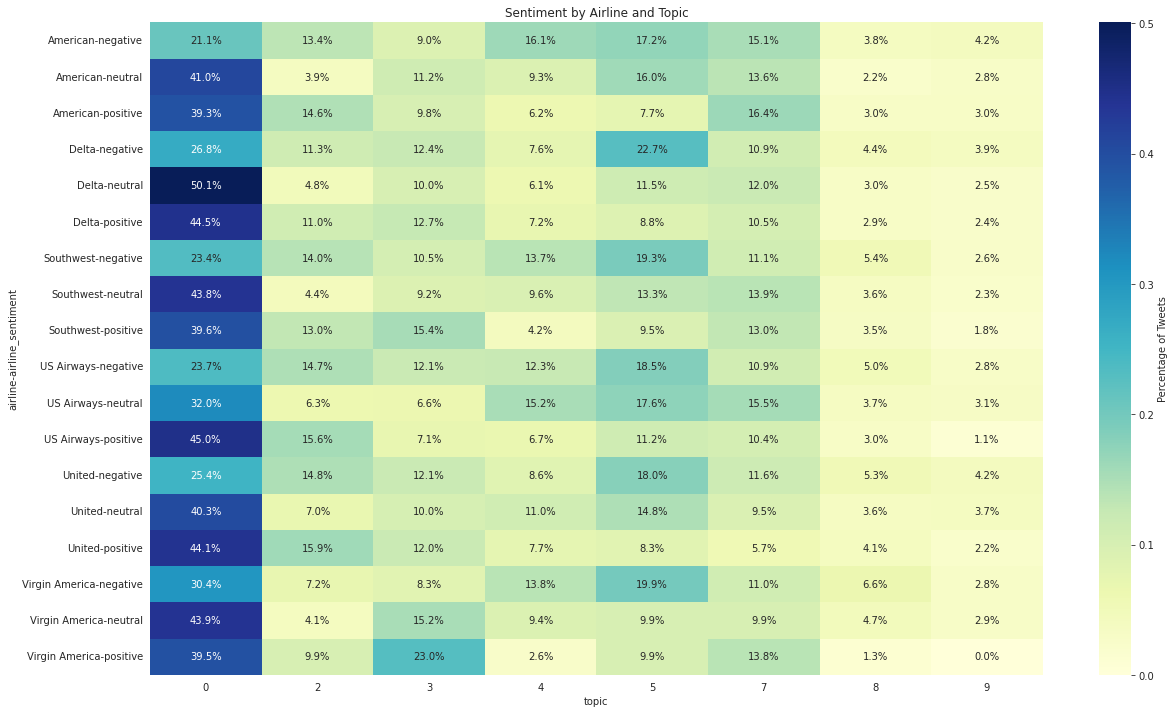

In [63]:
#heatmap
# Create a pivot table to count the number of tweets for each airline, sentiment, and topic
table = pd.pivot_table(df, values='text', index=['airline', 'airline_sentiment'], columns=['topic'], aggfunc= len, fill_value=0)

# Normalize the table by row to get the percentage of tweets in each topic for each airline/sentiment combination
table_norm = table.div(table.sum(axis=1), axis=0)

# Create a heatmap using seaborn
plt.figure(figsize=(20, 12))
sns.heatmap(table_norm, cmap='YlGnBu', annot=True, fmt='.1%', cbar_kws={'label': 'Percentage of Tweets'})
plt.title('Sentiment by Airline and Topic')
plt.show()

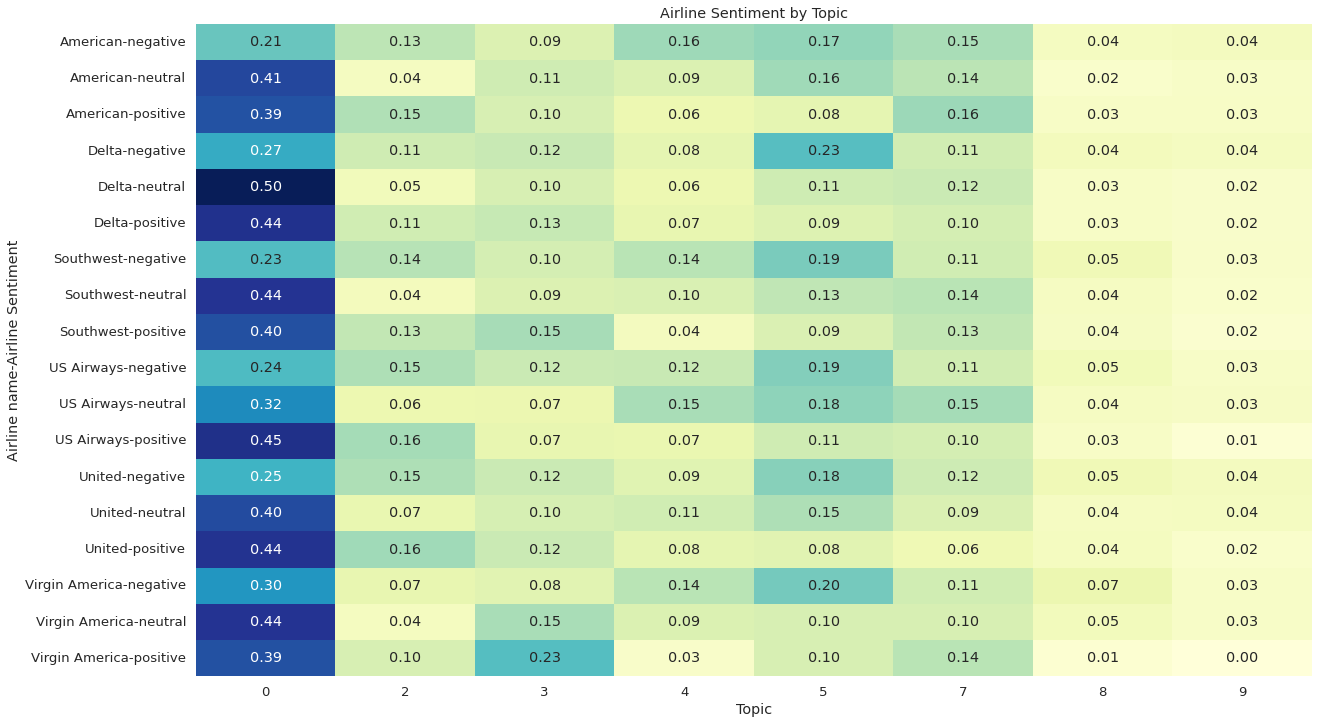

In [64]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random

#create a sample dataframe
df_test = pd.DataFrame({
    'Airline name': df['airline'],
    'Airline Sentiment': df['airline_sentiment'],
    'Topic': df['topic'],
    'text': df['text']
    #'Count': df.groupby(['airline','airline_sentiment', 'topic']).size().reset_index(name = 'count')
})

# Count the occurrences of each combination of airline, sentiment, and topic
count_df = df_test.groupby(['Airline name', 'Airline Sentiment', 'Topic']).size().reset_index(name='Count')

# Merge the counts back into the original DataFrame
df_test = pd.merge(df_test, count_df, on=['Airline name', 'Airline Sentiment', 'Topic'])

# Calculate row and column totals
row_totals = df_test.groupby(['Airline name', 'Airline Sentiment'])['Count'].transform('sum')
col_totals = df_test.groupby('Topic')['Count'].transform('sum')

# Divide counts by totals to get percentages
df_test['Row Percentage'] = (df_test['Count'] / row_totals)
df_test['Column Percentage'] = (df_test['Count'] / col_totals)

# Reshape the DataFrame for plotting
heatmap_data = df_test.pivot_table(values='text', index=['Airline name', 'Airline Sentiment'], columns='Topic', aggfunc = len, fill_value= 0)
#heatmap_data = pd.test.pivot_table(df_test, values='Row Percentage', index=['Airline name', 'Airline Sentiment'], columns='Topic')
table_norm = heatmap_data.div(heatmap_data.sum(axis=1), axis=0)


# Plot the heatmap
sns.set(font_scale=1.2)
plt.figure(figsize=(20, 12))
sns.heatmap(table_norm, cmap="YlGnBu", annot=True, fmt='.2f', cbar=False)
plt.title('Airline Sentiment by Topic')
plt.show()

In [ ]:
# # reshape the dataframe for plotting
# heatmap_data = df_test.pivot_table(values='Count', index=['Airline name', 'Airline Sentiment'], columns='Topic', aggfunc='sum')

# # get the topics in the desired order
# topics = ['Topic ' + str(i) for i in range(11)]

# # reindex the columns in the heatmap_data
# heatmap_data = heatmap_data.reindex(columns=topics)

# # plot the heatmap
# sns.set(font_scale=1.2)
# plt.figure(figsize=(10, 8))
# sns.heatmap(heatmap_data, cmap="YlGnBu", annot=True, fmt='g', cbar=False)
# plt.title('Airline Sentiment by Topic')
# plt.show()

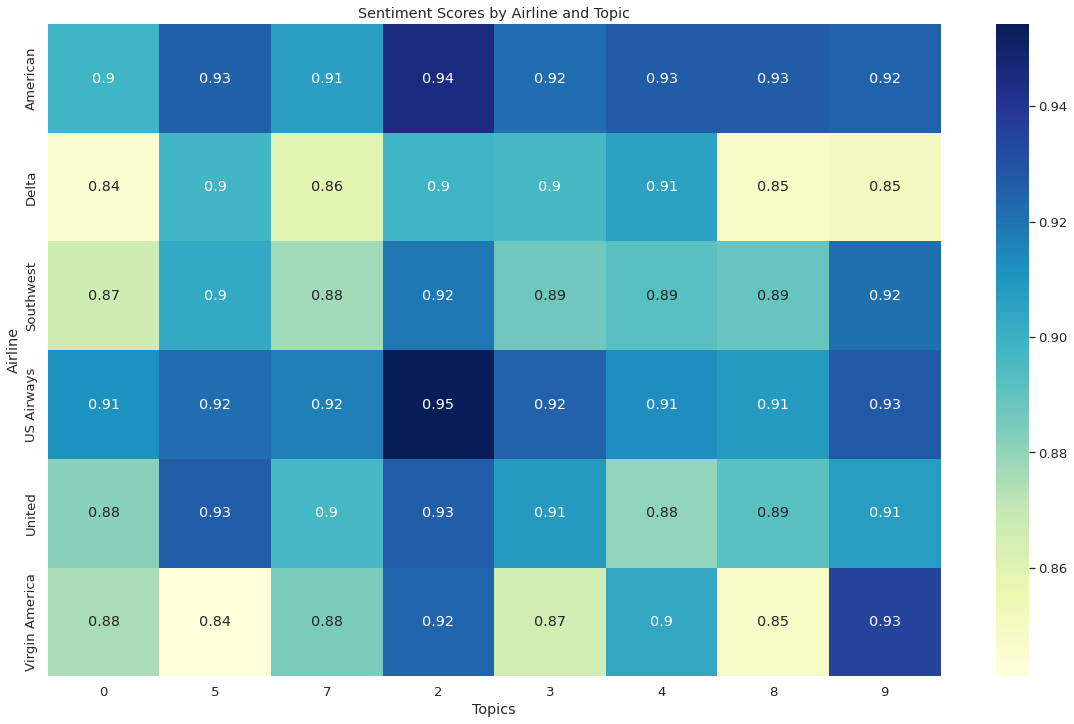

In [66]:
#create a sample dataframe
df_test = pd.DataFrame({
    'Airline name': df['airline'],
    'Airline Sentiment': df['airline_sentiment'],
    'Topic': df['topic'],
    'text': df['text'],
    'Airline Sentiment Confidence': df['airline_sentiment_confidence']
    #'Count': df.groupby(['airline','airline_sentiment', 'topic']).size().reset_index(name = 'count')
})

# join the extracted noun phrases into a single string
#df['Noun Phrases'] = df['Noun Phrases'].apply(lambda x: ' '.join(x))

# create a pivot table with mean sentiment score for each airline-noun phrase combination
pivot_table = pd.pivot_table(df_test, index='Airline name', columns='Topic', values='Airline Sentiment Confidence', aggfunc='mean')

# get top 20 most common noun phrases
top_20_nouns = df_test['Topic'].value_counts().nlargest(20).index.tolist()

# filter the pivot table to only include top 20 noun phrases
pivot_table = pivot_table[top_20_nouns]

# plot the heatmap
plt.figure(figsize=(20,12))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True)
plt.title('Sentiment Scores by Airline and Topic')
plt.xlabel('Topics')
plt.ylabel('Airline')
plt.show()

tweet_id airline_sentiment  airline_sentiment_confidence  \
0  570306133677760513           neutral                        1.0000   
1  570301130888122368          positive                        0.3486   
2  570301083672813571           neutral                        0.6837   
3  570301031407624196          negative                        1.0000   
4  570300817074462722          negative                        1.0000   

  negativereason  negativereason_confidence         airline  \
0            NaN                        NaN  Virgin America   
1            NaN                     0.0000  Virgin America   
2            NaN                        NaN  Virgin America   
3     Bad Flight                     0.7033  Virgin America   
4     Can't Tell                     1.0000  Virgin America   

  airline_sentiment_gold        name negativereason_gold  retweet_count  \
0                    NaN     cairdin                 NaN              0   
1                    NaN    jnardino                 NaN              0   
2                    NaN  yvonnalynn                 NaN              0   
3                    NaN    jnardino                 NaN              0   
4                    NaN    jnardino                 NaN              0   

                                                text tweet_coord  \
0                @VirginAmerica What @dhepburn said.         NaN   
1  @VirginAmerica plus you've added commercials t...         NaN   
2  @VirginAmerica I didn't today... Must mean I n...         NaN   
3  @VirginAmerica it's really aggressive to blast...         NaN   
4  @VirginAmerica and it's a really big bad thing...         NaN   

               tweet_created tweet_location               user_timezone  \
0  2015-02-24 11:35:52 -0800            NaN  Eastern Time (US & Canada)   
1  2015-02-24 11:15:59 -0800            NaN  Pacific Time (US & Canada)   
2  2015-02-24 11:15:48 -0800      Lets Play  Central Time (US & Canada)   
3  2015-02-24 11:15:36 -0800            NaN  Pacific Time (US & Canada)   
4  2015-02-24 11:14:45 -0800            NaN  Pacific Time (US & Canada)   

  predicted_emotions  topic                                         text_clean  
0            neutral      0                  virginamerica what dhepburn said.  
1            neutral      0  virginamerica plus youve added commercials to ...  
2              worry      4  virginamerica i didnt today... must mean i nee...  
3              worry      7  virginamerica its really aggressive to blast o...  
4              worry      7  virginamerica and its a really big bad thing a...

In [96]:
df.topic.value_counts()

0    4525
5    2358
7    1752
2    1751
3    1636
4    1528
8     625
9     465
Name: topic, dtype: int64

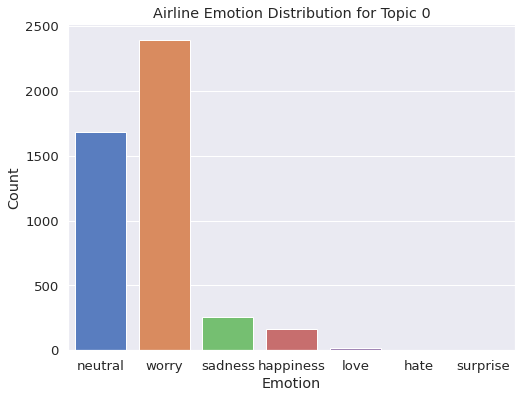

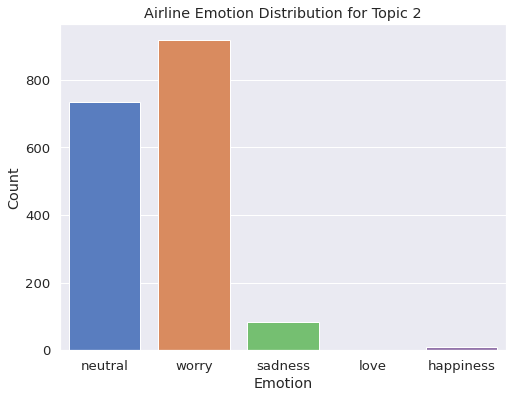

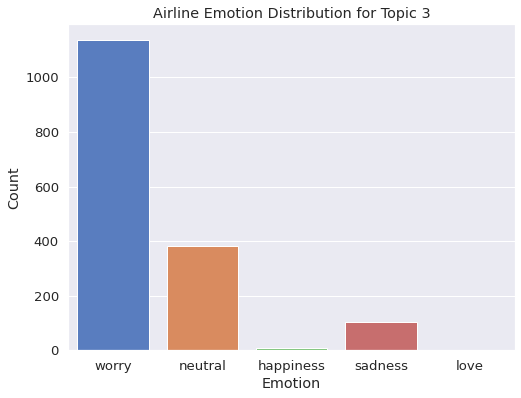

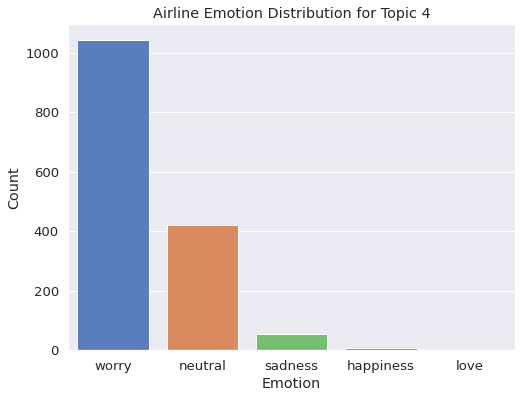

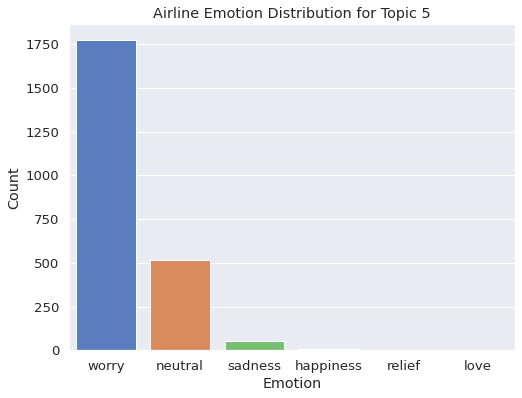

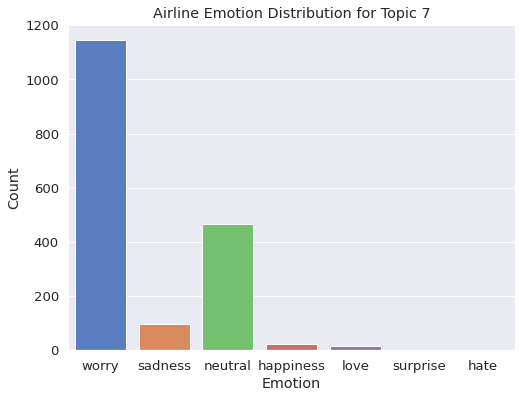

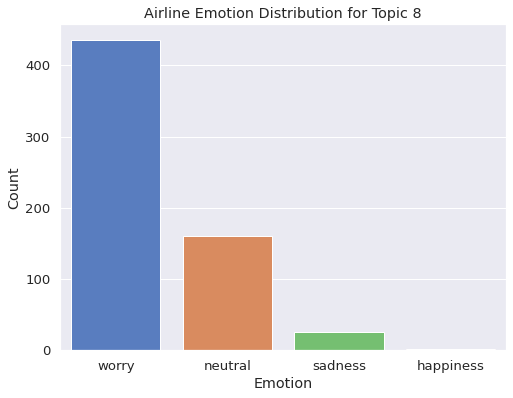

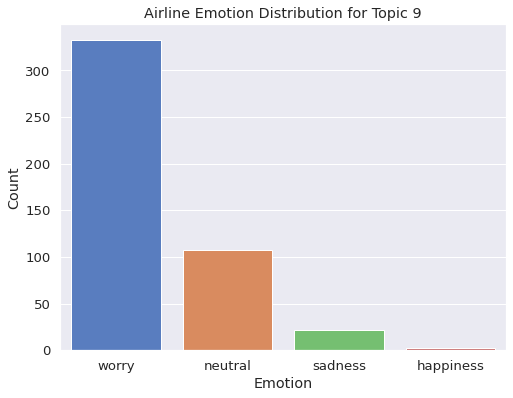

In [97]:
import seaborn as sns
import matplotlib.pyplot as plt

topics = [0,2,3,4,5,7,8,9]
for topic in topics:
    # Subset the dataframe for the current topic
    df_sub = df[df['topic']==topic]
    
    # Create the bar plot
    sns.set_style("darkgrid")
    plt.figure(figsize=(8,6))
    ax = sns.countplot(x='predicted_emotions', data=df_sub, palette="muted")
    
    # Set the axis labels and title
    ax.set_xlabel("Topics")
    ax.set_ylabel("Count")
    ax.set_title("Airline Emotion Distribution for Topic {}".format(topic))
    
    # Show the plot
    plt.show()


**Part 6: Pick Southwest and United. Show how these airlines differ based on the emotions consumers express about them in the tweets.**

Pivot table for southwest sentiment and predicted emotions:
 predicted_emotions  happiness  hate  love  neutral  sadness  worry
airline_sentiment                                                 
negative                  2.0   1.0   0.0    248.0     84.0  851.0
neutral                   7.0   0.0   2.0    218.0     58.0  379.0
positive                 45.0   0.0  14.0    188.0     38.0  285.0


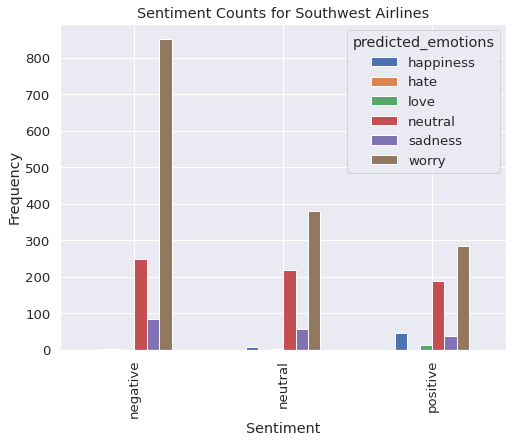

In [67]:
# filter the dataframe for tweets about Southwest and United
southwest_df = df[df['airline'] == 'Southwest']
united_df = df[df['airline'] == 'United']

# count the frequency of each sentiment for each airline
southwest_sentiment_counts = southwest_df.groupby('airline_sentiment')["predicted_emotions"].value_counts().unstack().fillna(0)
united_sentiment_counts = united_df.groupby('airline_sentiment')["predicted_emotions"].value_counts().unstack().fillna(0)

print("Pivot table for southwest sentiment and predicted emotions:\n", southwest_sentiment_counts)
import matplotlib.pyplot as plt

# plot the bar chart
southwest_sentiment_counts.plot(kind='bar', figsize=(8,6))

# set the title and axis labels
plt.title('Sentiment Counts for Southwest Airlines')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')

# show the plot
plt.show()

Pivot table for American sentiment and predicted emotions:
 predicted_emotions  happiness  love  neutral  sadness   worry
airline_sentiment                                            
negative                  3.0   1.0    406.0     92.0  1458.0
neutral                   8.0   0.0    143.0     11.0   301.0
positive                 39.0   2.0    135.0      9.0   151.0


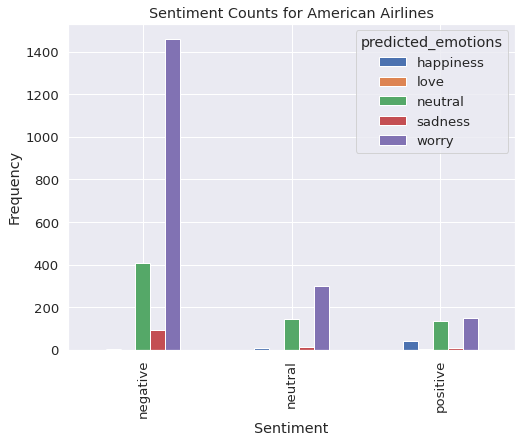

In [102]:
# filter the dataframe for tweets about Southwest and United
american_df = df[df['airline'] == 'American']
virgin_df = df[df['airline'] == 'Virgin America']

# count the frequency of each sentiment for each airline
american_df_counts = american_df.groupby('airline_sentiment')["predicted_emotions"].value_counts().unstack().fillna(0)
virgin_df_counts = virgin_df.groupby('airline_sentiment')["predicted_emotions"].value_counts().unstack().fillna(0)

print("Pivot table for American sentiment and predicted emotions:\n", american_df_counts)
import matplotlib.pyplot as plt

# plot the bar chart
american_df_counts.plot(kind='bar', figsize=(8,6))

# set the title and axis labels
plt.title('Sentiment Counts for American Airlines')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')

# show the plot
plt.show()

Pivot table for Virgin sentiment and predicted emotions:
 predicted_emotions  happiness  love  neutral  sadness  surprise  worry
airline_sentiment                                                     
negative                  1.0   0.0     36.0      9.0       0.0  135.0
neutral                   1.0   0.0     57.0     16.0       1.0   96.0
positive                  8.0   4.0     59.0      7.0       0.0   74.0


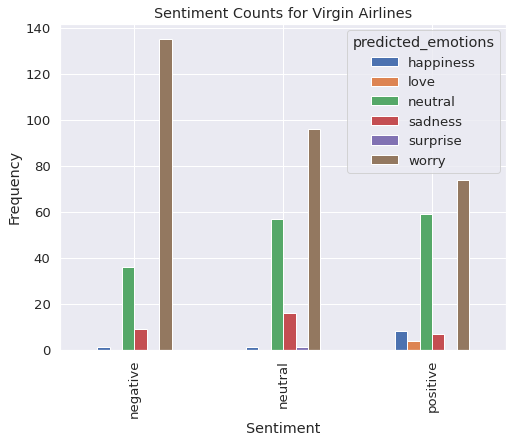

In [101]:
# filter the dataframe for tweets about Southwest and United
american_df = df[df['airline'] == 'American']
virgin_df = df[df['airline'] == 'Virgin America']

# count the frequency of each sentiment for each airline
american_df_counts = american_df.groupby('airline_sentiment')["predicted_emotions"].value_counts().unstack().fillna(0)
virgin_df_counts = virgin_df.groupby('airline_sentiment')["predicted_emotions"].value_counts().unstack().fillna(0)

print("Pivot table for Virgin sentiment and predicted emotions:\n", virgin_df_counts)
import matplotlib.pyplot as plt

# plot the bar chart
virgin_df_counts.plot(kind='bar', figsize=(8,6))

# set the title and axis labels
plt.title('Sentiment Counts for Virgin Airlines')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')

# show the plot
plt.show()

Pivot table for southwest sentiment and predicted emotions:
 predicted_emotions  happiness  neutral  sadness   worry
airline_sentiment                                      
negative                  1.0    948.0     76.0  1608.0
neutral                   0.0    423.0     17.0   257.0
positive                  2.0    310.0      7.0   173.0


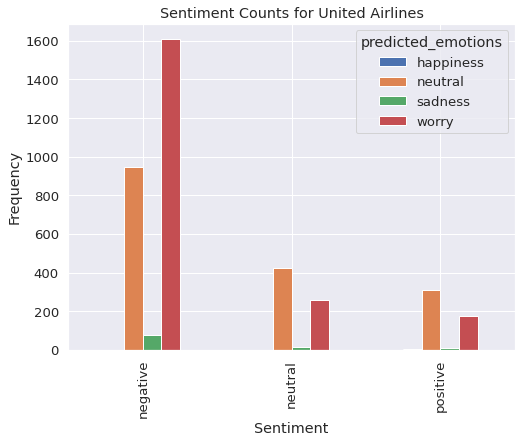

In [68]:

import matplotlib.pyplot as plt

print("Pivot table for southwest sentiment and predicted emotions:\n", united_sentiment_counts)

# plot the bar chart
united_sentiment_counts.plot(kind='bar', figsize=(8,6))

# set the title and axis labels
plt.title('Sentiment Counts for United Airlines')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')

# show the plot
plt.show()

**Part 7: Pick two topics (dimensions) and create a perception map of how all the airlines are located on the two-dimensional map. The axes go from -1 to 1, where 1 denotes that all the tweets pertinent to an airline about that topic are positive, whereas -1 denotes that all tweets are negative.**

In [ ]:
# Based on the generateed topics we picked 2 topics

In [111]:
df['text_clean'] = df['text'].map(lambda x: re.sub('[^a-zA-Z0-9  . , : - _]', '', str(x)))
df.text_clean = df.text_clean.str.lower()
df[['text','text_clean']][-10:]


text  \
14630                        @AmericanAir Thanks! He is.   
14631  @AmericanAir thx for nothing on getting us out...   
14632  “@AmericanAir: @TilleyMonsta George, that does...   
14633  @AmericanAir my flight was Cancelled Flightled...   
14634         @AmericanAir right on cue with the delays👌   
14635  @AmericanAir thank you we got on a different f...   
14636  @AmericanAir leaving over 20 minutes Late Flig...   
14637  @AmericanAir Please bring American Airlines to...   
14638  @AmericanAir you have my money, you change my ...   
14639  @AmericanAir we have 8 ppl so we need 2 know h...   

                                              text_clean  
14630                          americanair thanks he is.  
14631  americanair thx for nothing on getting us out ...  
14632  americanair: tilleymonsta george, that doesnt ...  
14633  americanair my flight was cancelled flightled,...  
14634           americanair right on cue with the delays  
14635  americanair thank you we got on a different fl...  
14636  americanair leaving over 20 minutes late fligh...  
14637  americanair please bring american airlines to ...  
14638  americanair you have my money, you change my f...  
14639  americanair we have 8 ppl so we need 2 know ho...

Topic 1: Flight Cancellation/delay

In [132]:
positive_feedback = df[df.text_clean.str.contains('thank|back|check|email|gate|rebooke|people|hope|land|team')]
len(positive_feedback)
list(positive_feedback.text_clean)[:18]


['virginamerica thanks',
 'virginamerica status match program.  i applied and its been three weeks.  called and emailed with no response.',
 'virginamerica is flight 769 on its way was supposed to take off 30 minutes ago. website still shows on time not in flight. thanks.',
 'virginamerica flight 0736 dal to dca 224 2:10pm. tried to check in could not. status please.',
 'virginamerica i emailed your customer service team. let me know if you need the tracking number.',
 'virginamerica first time flying you all. do you have a different ratepolicy for media bags thanks',
 'virginamerica what is going on with customer service is there anyway to speak to a human asap thank you.',
 'virginamerica ive applied more then once to be a member of the inflight crew team...im 100 interested. flightattendant dreampath g',
 'virginamerica why is the site down  when will it be back up',
 'virginamerica just landed in lax, an hour after i should of been here. your no late flight bag check is not busines

In [133]:
percent_calc = lambda y:y.sum()/y.count()
positive_feedback_count = positive_feedback.groupby(['airline','airline_sentiment']).agg({'tweet_id':['count']})
positive_feedback_count
positive_feedback_count.groupby(level=0).apply(lambda x:x / float(x.sum()))
positive_feedback_count_perc = positive_feedback_count.groupby(level=0).apply(lambda x:x / float(x.sum()))



In [134]:
names = positive_feedback_count_perc.index.get_level_values(0)
values = np.square(positive_feedback_count_perc.values)
print('Final Scores:')
print(names[0])
print(1-np.sum(values[0:3]))
print(names[3])
print(1-np.sum(values[3:6]))
print(names[6])
print(1-np.sum(values[6:9]))
print(names[9])
print(1-np.sum(values[9:12]))
print(names[12])
print(1-np.sum(values[12:15]))
print(names[15])
print(1-np.sum(values[15:18]))
positive_feedback_score = [1-np.sum(values[0:3]),1-np.sum(values[3:6]),1-np.sum(values[6:9]),1-np.sum(values[9:12]),1-np.sum(values[12:15]), 1-np.sum(values[15:18])]

Final Scores:
American
0.5335568050749712
Delta
0.6345425829475309
Southwest
0.6397258186620357
US Airways
0.49163561567975955
United
0.5517789515836846
Virgin America
0.6078713013501867


Topic 2: Customer Service

In [112]:
customer_service = df[df.text_clean.str.contains('call|help|need|phone|book|line|response|long|baggage|also')]
len(customer_service)
list(customer_service.text_clean)[:18]


['virginamerica i didnt today... must mean i need to take another trip',
 'virginamerica  i flew from nyc to sfo last week and couldnt fully sit in my seat due to two large gentleman on either side of me. help',
 'virginamerica status match program.  i applied and its been three weeks.  called and emailed with no response.',
 'virginamerica hi i just bked a cool birthday trip with you, but i cant add my elevate no. cause i entered my middle name during flight booking problems ',
 'virginamerica are the hours of operation for the club at sfo that are posted online current',
 'virginamerica help, left expensive headphones on flight 89 iad to lax today. seat 2a. no one answering lampf number at lax',
 'virginamerica awaiting my return phone call, just would prefer to use your online selfservice option :',
 'virginamerica freddieawards done and done best airline around, hands down',
 'virginamerica when can i book my flight to hawaii',
 'virginamerica hey, first time flyer next week  excit

In [114]:
percent_calc = lambda y:y.sum()/y.count()
customer_service_count = customer_service.groupby(['airline','airline_sentiment']).agg({'tweet_id':['count']})
customer_service_count
customer_service_count.groupby(level=0).apply(lambda x:x / float(x.sum()))
customer_service_count_perc = customer_service_count.groupby(level=0).apply(lambda x:x / float(x.sum()))

In [115]:
names = customer_service_count_perc.index.get_level_values(0)
values = np.square(customer_service_count_perc.values)
print('Final Scores:')
print(names[0])
print(1-np.sum(values[0:3]))
print(names[3])
print(1-np.sum(values[3:6]))
print(names[6])
print(1-np.sum(values[6:9]))
print(names[9])
print(1-np.sum(values[9:12]))
print(names[12])
print(1-np.sum(values[12:15]))
print(names[15])
print(1-np.sum(values[15:18]))
customer_service_score = [1-np.sum(values[0:3]),1-np.sum(values[3:6]),1-np.sum(values[6:9]),1-np.sum(values[9:12]),1-np.sum(values[12:15]), 1-np.sum(values[15:18])]


Final Scores:
American
0.3111005758364348
Delta
0.6177769755144513
Southwest
0.5284603626601283
US Airways
0.299969015032985
United
0.42044039654429266
Virgin America
0.6070712504278939


In [116]:
Ticketing_Issues = df[df.text_clean.str.contains('ticket|sit|answer|due|morning|last|pay|night|stick|understand')]
len(Ticketing_Issues)
list(Ticketing_Issues.text_clean)[:18]


['virginamerica its really aggressive to blast obnoxious entertainment in your guests faces amp they have little recourse',
 'virginamerica seriously would pay 30 a flight for seats that didnt have this playing.its really the only bad thing about flying va',
 'virginamerica  i flew from nyc to sfo last week and couldnt fully sit in my seat due to two large gentleman on either side of me. help',
 'virginamerica what happened 2 ur vegan food options at least say on ur site so i know i wont be able 2 eat anything for next 6 hrs fail',
 'virginamerica help, left expensive headphones on flight 89 iad to lax today. seat 2a. no one answering lampf number at lax',
 'virginamerica your chat support is not working on your site: http:t.covhp2gtdwpk',
 'virginamerica i have an unused ticket but moved to a new city where you dont fly. how can i fly with you before it expires travelhelp',
 'virginamerica ladygaga carrieunderwood after last night tribute soundofmusic oscars2015 ladygaga i think carri

In [118]:
percent_calc = lambda y:y.sum()/y.count()
Ticketing_Issues_count = Ticketing_Issues.groupby(['airline','airline_sentiment']).agg({'tweet_id':['count']})
Ticketing_Issues_count
Ticketing_Issues_count.groupby(level=0).apply(lambda x:x / float(x.sum()))
Ticketing_Issues_count_perc = Ticketing_Issues_count.groupby(level=0).apply(lambda x:x / float(x.sum()))

In [119]:
names = Ticketing_Issues_count_perc.index.get_level_values(0)
values = np.square(Ticketing_Issues_count_perc.values)
print('Final Scores:')
print(names[0])
print(1-np.sum(values[0:3]))
print(names[3])
print(1-np.sum(values[3:6]))
print(names[6])
print(1-np.sum(values[6:9]))
print(names[9])
print(1-np.sum(values[9:12]))
print(names[12])
print(1-np.sum(values[12:15]))
print(names[15])
print(1-np.sum(values[15:18]))
Ticketing_Issues_score = [1-np.sum(values[0:3]),1-np.sum(values[3:6]),1-np.sum(values[6:9]),1-np.sum(values[9:12]),1-np.sum(values[12:15]), 1-np.sum(values[15:18])]


Final Scores:
American
0.32307489614979223
Delta
0.5231252264219297
Southwest
0.5689844632337231
US Airways
0.2851033137286675
United
0.36109126046709283
Virgin America
0.5316422248645791


In [140]:
airlines = ['American', 'Delta', 'Southwest', 'US Airways', 'United', 'Virgin America']
customer_service_score = pd.DataFrame(positive_feedback_score)
Ticketing_Issues_score = pd.DataFrame(Ticketing_Issues_score)
final_score = pd.concat([customer_service_score,Ticketing_Issues_score],axis=1)
final_score
final_score.fillna(0)

0         0
0  0.533557  0.323075
1  0.634543  0.523125
2  0.639726  0.568984
3  0.491636  0.285103
4  0.551779  0.361091
5  0.607871  0.531642

In [141]:
final_score.columns = ['Customer Service', 'Ticketing Issues']
final_score.index = airlines
final_score = round(final_score,2)
final_score.fillna(0)


Customer Service  Ticketing Issues
American                    0.53              0.32
Delta                       0.63              0.52
Southwest                   0.64              0.57
US Airways                  0.49              0.29
United                      0.55              0.36
Virgin America              0.61              0.53

In [137]:
from sklearn.manifold import MDS
embedding = MDS(n_components=2,random_state=2019)
scores_transformed = embedding.fit_transform(final_score)
scores_transformed.shape

/usr/local/lib/python3.9/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


(6, 2)

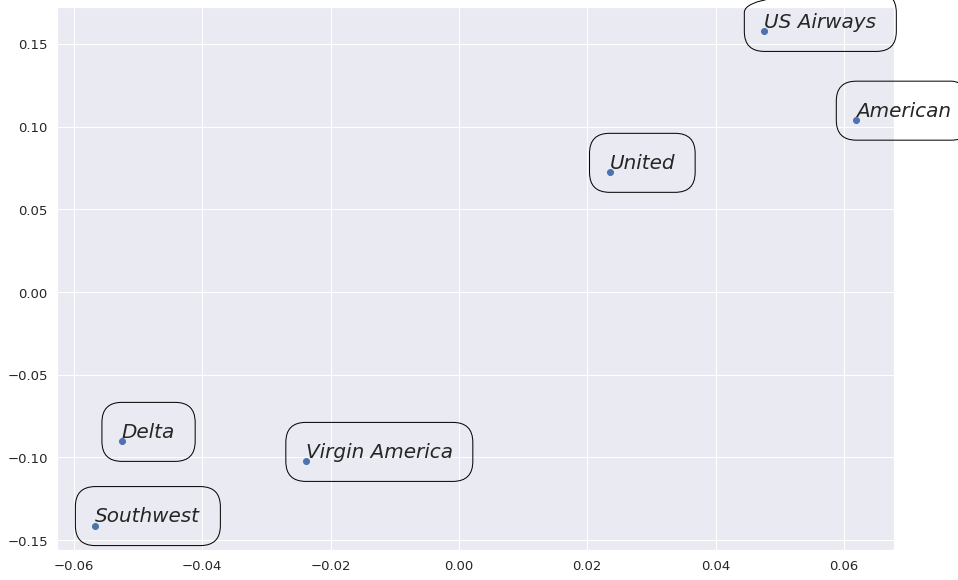

In [142]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(15, 10))
ax.scatter(scores_transformed[:,0],scores_transformed[:,1])

for i, txt in enumerate(list(final_score.index)):
    ax.annotate(txt, (scores_transformed[i,0], scores_transformed[i,1]),fontsize=20,
                 style='italic',horizontalalignment='left',verticalalignment='bottom',
                bbox=dict(facecolor='none', edgecolor='black', boxstyle='round,pad=1'),
               annotation_clip=False)

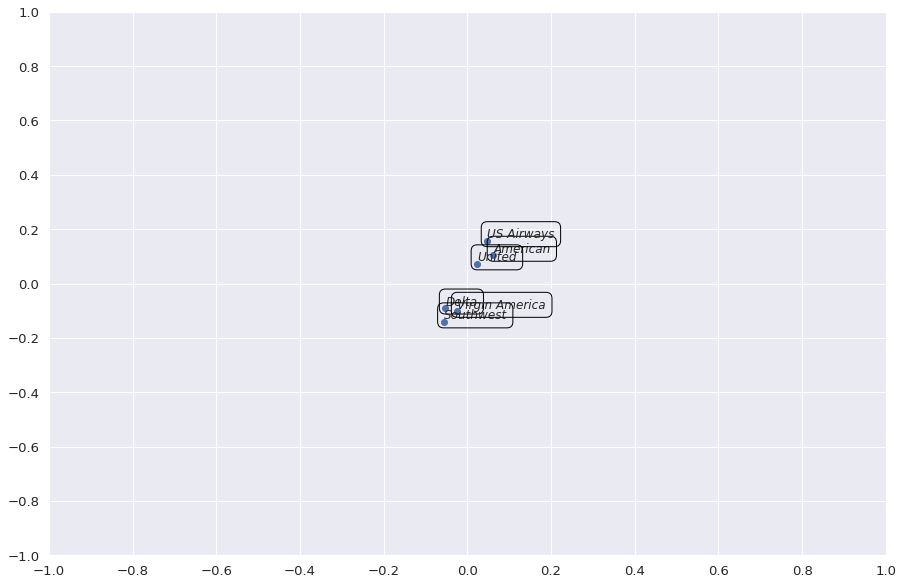

In [147]:
fig, ax = plt.subplots(figsize=(15, 10))
ax.scatter(scores_transformed[:,0],scores_transformed[:,1])

# Set the x and y axis limits to -1 to 1
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_xticks([-1, -0.8, -0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])
ax.set_yticks([-1, -0.8, -0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])



for i, txt in enumerate(list(final_score.index)):
    ax.annotate(txt, (scores_transformed[i,0], scores_transformed[i,1]), fontsize=12,
                 style='italic',horizontalalignment='left',verticalalignment='bottom',
                bbox=dict(facecolor='none', edgecolor='black', boxstyle='round,pad=0.5'),
               annotation_clip=False)